In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [13]:
# Cargar el dataset
data = pd.read_csv('data.csv')

# Convertir la columna "Month" a un índice de tiempo
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [14]:
# Preparar las características y etiquetas
# Vamos a usar la cantidad de manchas solares como serie temporal
X = data['Sunspots'].values

# Crear series de tiempo para RNN con una ventana de tiempo de 10
window_size = 10
X_rnn = []
y_rnn = []
for i in range(len(X) - window_size):
    X_rnn.append(X[i:i + window_size])
    y_rnn.append(X[i + window_size])
X_rnn = np.array(X_rnn)
y_rnn = np.array(y_rnn)

In [15]:
# Para FFNN, simplemente usamos los datos actuales sin ventana de tiempo
X_ffnn = X_rnn.reshape(X_rnn.shape[0], -1)
y_ffnn = y_rnn

# Dividir los datos en entrenamiento y prueba
X_ffnn_train, X_ffnn_test, y_ffnn_train, y_ffnn_test = train_test_split(X_ffnn, y_ffnn, test_size=0.2, random_state=42)
X_rnn_train, X_rnn_test, y_rnn_train, y_rnn_test = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)

# Feed Forward Neural Network (FFNN)

In [16]:
# Definir la estructura de la FFNN
model_ffnn = Sequential()
model_ffnn.add(Dense(64, input_dim=X_ffnn_train.shape[1], activation='relu'))
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dense(1))  # Salida para regresión

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compilar el modelo
model_ffnn.compile(optimizer='adam', loss='mse')

In [18]:
# Entrenar el modelo
model_ffnn.fit(X_ffnn_train, y_ffnn_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2626.9333 - val_loss: 357.9413
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 307.8001 - val_loss: 297.8672
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 268.1450 - val_loss: 285.9872
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 248.9475 - val_loss: 277.5980
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 238.0767 - val_loss: 274.2807
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 212.1004 - val_loss: 266.4828
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 264.3199 - val_loss: 284.2479
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254.4395 - val_loss: 304.2777
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 225.8706 - val_loss: 341.1592
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 249.3868 - val_loss: 281.0676
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 230.8935 - val_loss: 294.0345
Epoch 12/100
57/57

In [25]:
# Predicciones FFNN
pred_ffnn = model_ffnn.predict(X_ffnn_test)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [19]:
# Evaluar el modelo
loss_ffnn = model_ffnn.evaluate(X_ffnn_test, y_ffnn_test)
print(f"FFNN Loss: {loss_ffnn}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 294.0612 
FFNN Loss: 296.7139587402344


# Recurrent Neural Network (RNN)

In [20]:
# Reshape para RNN: (muestras, pasos de tiempo, características)
X_rnn_train = X_rnn_train.reshape((X_rnn_train.shape[0], window_size, 1))
X_rnn_test = X_rnn_test.reshape((X_rnn_test.shape[0], window_size, 1))

In [21]:
# Definir la estructura de la RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(window_size, 1), activation='relu'))
model_rnn.add(Dense(1))  # Salida para regresión

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='mse')


In [23]:
# Entrenar el modelo
model_rnn.fit(X_rnn_train, y_rnn_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 991.6060 - val_loss: 300.1219
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 275.5257 - val_loss: 273.8148
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259.5473 - val_loss: 281.9289
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 250.9406 - val_loss: 269.4711
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 236.2671 - val_loss: 272.8738
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 226.1308 - val_loss: 267.6308
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254.0101 - val_loss: 261.3276
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 249.4796 - val_loss: 264.5954
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 236.4238 - val_loss: 261.7434
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 246.3143 - val_loss: 261.5615
Epoch 11/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 238.1294 - val_loss: 265.7767
Epoch 12/100
57/57 

In [26]:
# Predicciones RNN
pred_rnn = model_rnn.predict(X_rnn_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [24]:
# Evaluar el modelo
loss_rnn = model_rnn.evaluate(X_rnn_test, y_rnn_test)
print(f"RNN Loss: {loss_rnn}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 279.3771 
RNN Loss: 291.7279357910156


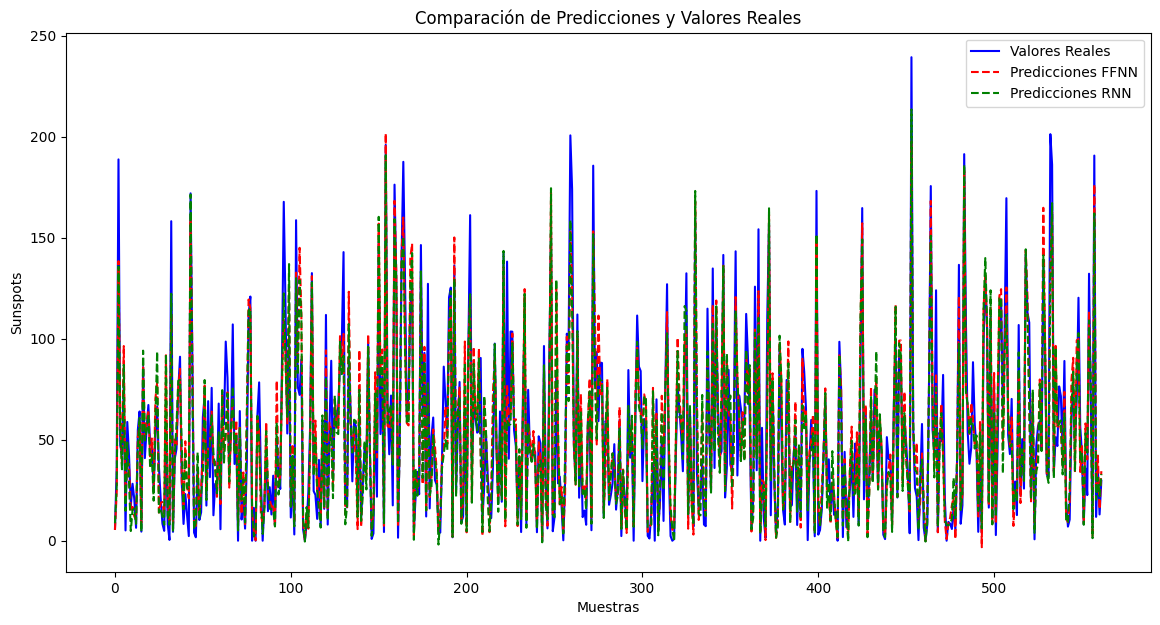

In [28]:
# Gráficas
plt.figure(figsize=(14, 7))

plt.plot(y_ffnn_test, label='Valores Reales', color='blue')
plt.plot(pred_ffnn, label='Predicciones FFNN', color='red', linestyle='--')
plt.plot(pred_rnn, label='Predicciones RNN', color='green', linestyle='--')

plt.title('Comparación de Predicciones y Valores Reales')
plt.xlabel('Muestras')
plt.ylabel('Sunspots')
plt.legend()
plt.show()

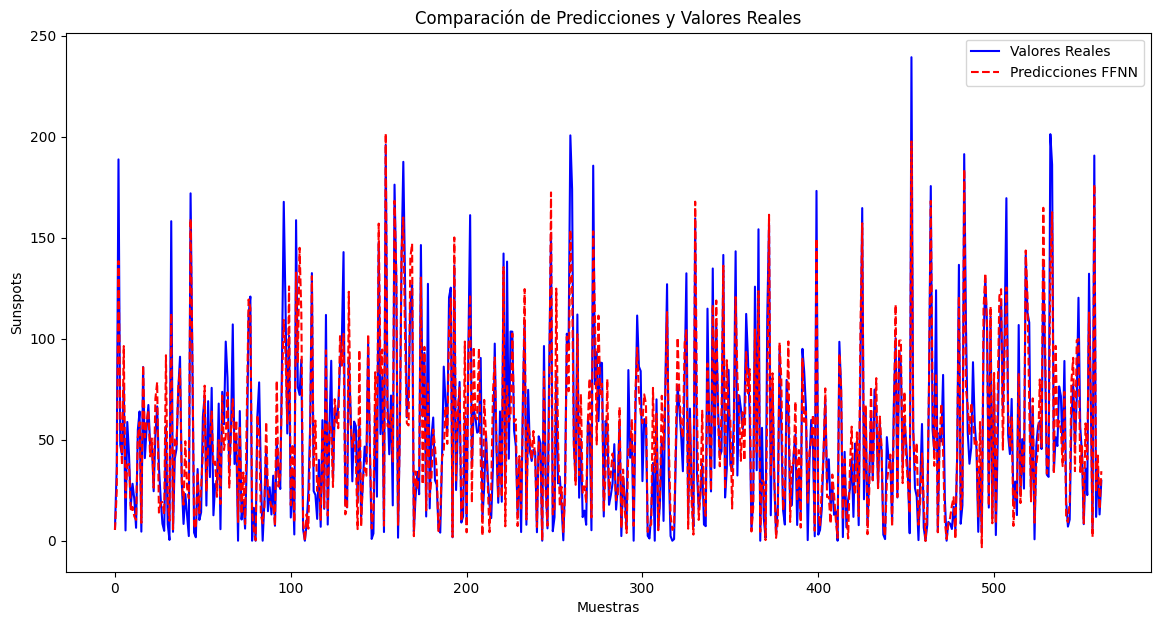

In [29]:
plt.figure(figsize=(14, 7))

plt.plot(y_ffnn_test, label='Valores Reales', color='blue')
plt.plot(pred_ffnn, label='Predicciones FFNN', color='red', linestyle='--')

plt.title('Comparación de Predicciones y Valores Reales')
plt.xlabel('Muestras')
plt.ylabel('Sunspots')
plt.legend()
plt.show()

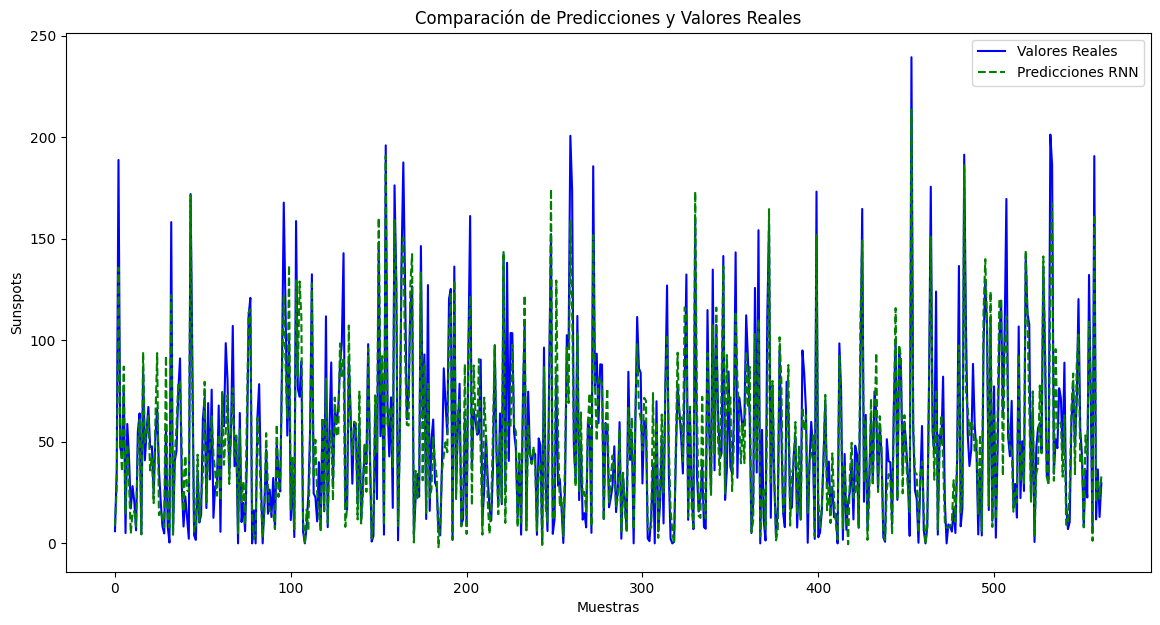

In [30]:
plt.figure(figsize=(14, 7))

plt.plot(y_ffnn_test, label='Valores Reales', color='blue')
plt.plot(pred_rnn, label='Predicciones RNN', color='green', linestyle='--')

plt.title('Comparación de Predicciones y Valores Reales')
plt.xlabel('Muestras')
plt.ylabel('Sunspots')
plt.legend()
plt.show()